In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings("ignore")

Data downloaded from kaggle (https://www.kaggle.com/jealousleopard/goodreadsbooks)
on the 16/09/19 at 13:23 gmt.

Very quickly into just importing the data (books.csv) into my "master" jupyter notebook, I noticed there were a few errors.

Here is a link to another repository where I went through cleaning up the data before using it here. (It goes through the errors 

Questions, Exploration, Ideas

Top 10 Authors by number of titles published[DONE]    
Top 5 Authors by average rating.[ FIX AUTHOR STRINGS IN ORIGINAL DF (See graph for issues (tabs/extra space)) ]  
Top 5 Authors by number of ratings.[ DONE ]  
(Any limit)  
(over 100)   
(over 1000)  
  
Top 5 Authors by avg number of pages per book.[DONE]
(possibly not a graph (see graph))  
   
Top 10 books by rating.[ DONE ]  
(Any limit)  
(over 100)  
(over 1000) 
  
Top 5 books by number of ratings. [ DONE ]   
  
  
Relationships  
Between ratings and no. of ratings.  
Between number of books published and avg rating(per author)  
Between number of pages and number of ratings.  

  
  
Look up seaborn palette colours.


In [5]:
df = pd.read_csv("./data/books.csv", error_bad_lines=False)

In [6]:
df.index = df['bookID']

In [7]:
df.tail(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
bookID,,,,,,,,,,
47708,47708,The Faeries' Oracle,Brian Froud-Jessica Macbeth,4.43,743201116,9780743201117,eng,224,1550,38
47709,47709,The World of The Dark Crystal,Brian Froud,4.29,1862056242,9781862056244,eng,132,3572,33


In [8]:
df.describe()

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
count,13719.000000,13719.000000,1.371900e+04,13719.000000,1.371900e+04,13719.000000
mean,22160.579270,3.930354,9.764024e+12,342.380713,1.775909e+04,533.439901
std,13699.603351,0.359400,3.986954e+11,252.618887,1.129371e+05,2528.565801
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10621.000000,3.770000,9.780345e+12,196.000000,8.250000e+01,7.000000
50%,21322.000000,3.960000,9.780613e+12,301.000000,6.300000e+02,40.000000
75%,33322.000000,4.130000,9.780940e+12,421.000000,4.737000e+03,222.000000
max,47709.000000,5.000000,9.790008e+12,6576.000000,5.629932e+06,93619.000000


In [9]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
# num_pages             int64
ratings_count           int64
text_reviews_count      int64
dtype: object

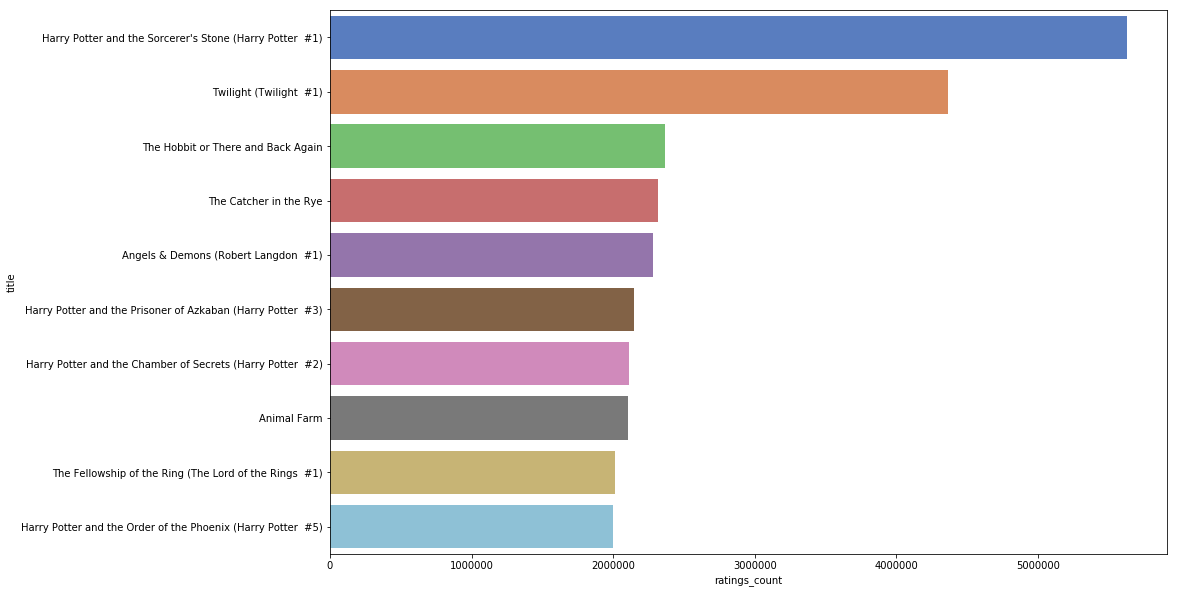

In [10]:
most_rated = df.sort_values('ratings_count', ascending=False).head(10).set_index('title')
plt.figure(figsize=(15, 10))
sns.barplot(most_rated['ratings_count'], most_rated.index, palette='muted')

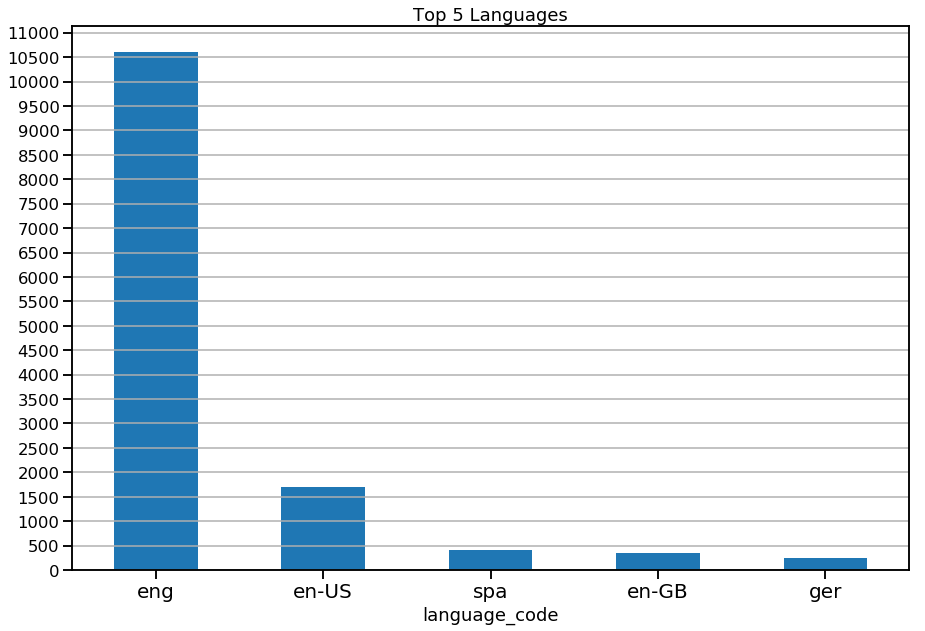

In [11]:
sns.set_context('talk')
plt.figure(figsize=(15,10))
ax =  df.groupby('language_code')['title'].count().sort_values(ascending=False).head(5).plot.bar()
plt.title('Top 5 Languages')
plt.xticks(fontsize = 20, rotation='horizontal')
plt.yticks([i*500 for i in range(0, 23)])
plt.grid(axis='y')

In [12]:
def minimalhbargraph():
    """Disables axis ticks and labels, outer axis 'box', sets seaborn context.
       Makes the graph very minimalist. (Have to use ax.text to put the )
    """
    sns.set_context('poster')
    ax.set_ylabel('')
    ax.set_xlabel("")
    ax.set_yticks([])
    ax.set_xticks([])
    plt.tight_layout()
    ax.axis('off')

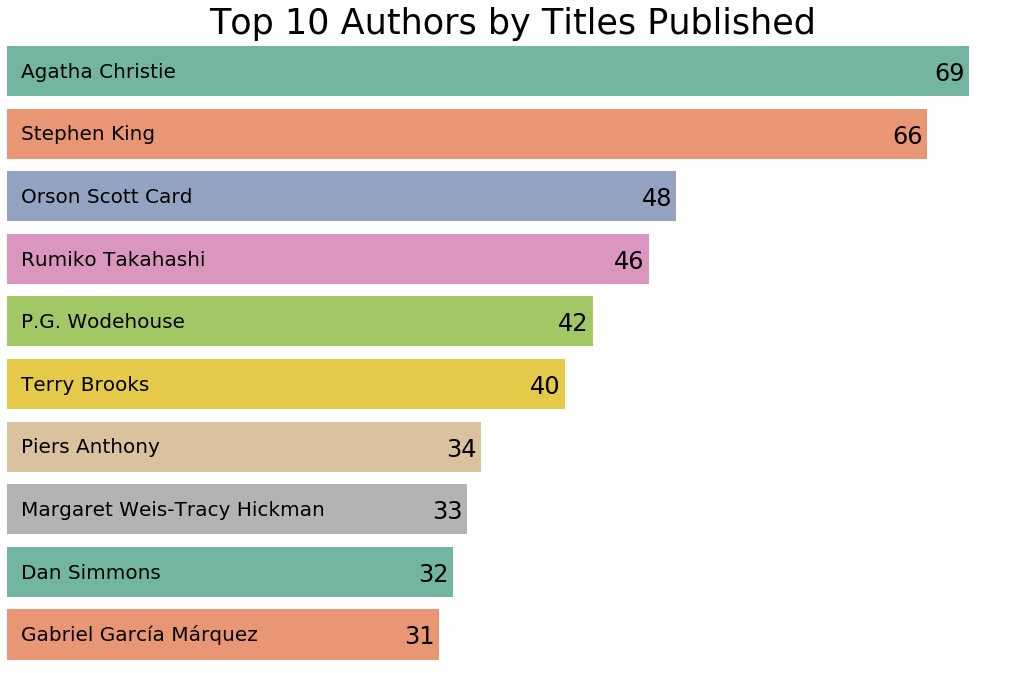

In [13]:
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='Set2')
ax.set_title("Top 10 Authors by Titles Published", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-2.5, i.get_y()+0.55, str(round(i.get_width()))[:-2], fontsize = 24, color = 'k')
    ax.text(1 , i.get_y()+0.5, str(most_books.index[num]), fontsize = 20, color = 'k')
    num += 1


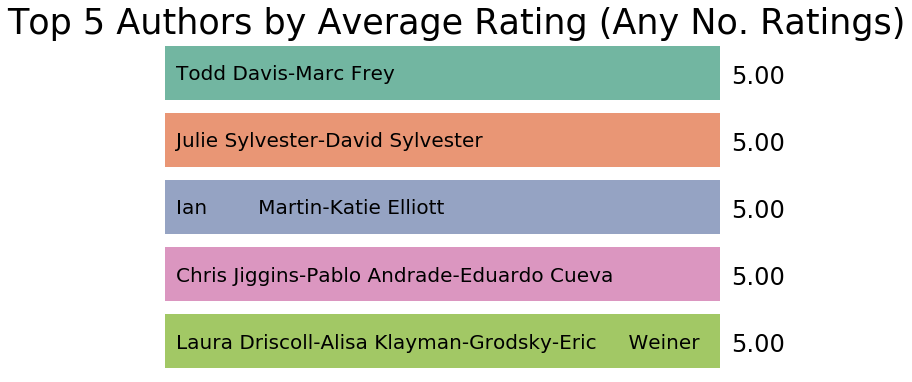

In [14]:
rating_author = df.groupby('authors').mean()
top_5_rating_author = rating_author.sort_values('average_rating', ascending=False).head(5)

rating_author = rating_author.loc[rating_author['ratings_count'] > 100]
top_5_rating_author_over100 = rating_author.sort_values('average_rating', ascending=False).head(5)

rating_author = rating_author.loc[rating_author['ratings_count'] > 1000]
top_5_rating_author_over1000 = rating_author.sort_values('average_rating', ascending=False).head(5)


plt.figure(figsize=(12, 6))
ax = sns.barplot(top_5_rating_author['average_rating'], top_5_rating_author.index, palette='Set2')
ax.set_title("Top 5 Authors by Average Rating (Any No. Ratings)", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()+0.1, i.get_y()+0.55, "{0:.2f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(0.1 , i.get_y()+0.5, str(top_5_rating_author.index[num]), fontsize = 20, color = 'k')
    num += 1



In [15]:
top_5_rating_author.head()

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
authors,,,,,,
Todd Davis-Marc Frey,23552.0,5.0,9.780762e+12,56.0,2.0,1.0
Julie Sylvester-David Sylvester,2560.0,5.0,9.783830e+12,83.0,1.0,0.0
Ian Martin-Katie Elliott,18184.0,5.0,9.780852e+12,96.0,1.0,0.0
Chris Jiggins-Pablo Andrade-Eduardo Cueva,45155.0,5.0,9.781551e+12,96.0,1.0,0.0
Laura Driscoll-Alisa Klayman-Grodsky-Eric Weiner,36853.0,5.0,9.780787e+12,24.0,2.0,1.0


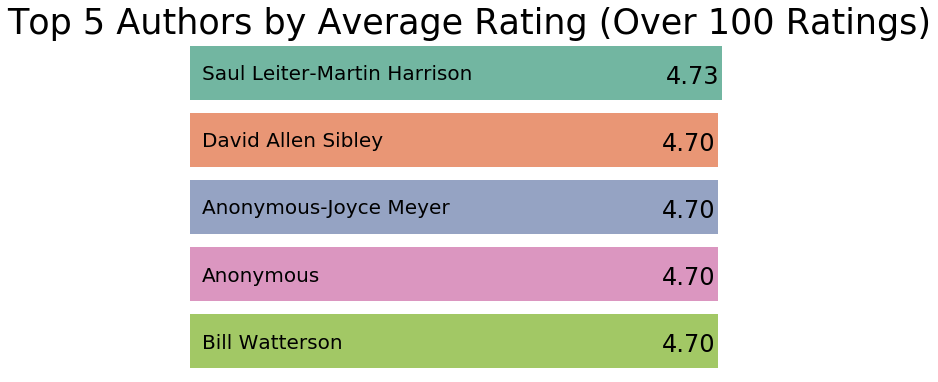

In [16]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(top_5_rating_author_over100['average_rating'], top_5_rating_author_over100.index, palette='Set2')
ax.set_title("Top 5 Authors by Average Rating (Over 100 Ratings)", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-0.5, i.get_y()+0.55, "{0:.2f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(0.1 , i.get_y()+0.5, str(top_5_rating_author_over100.index[num]), fontsize = 20, color = 'k')
    num += 1

    


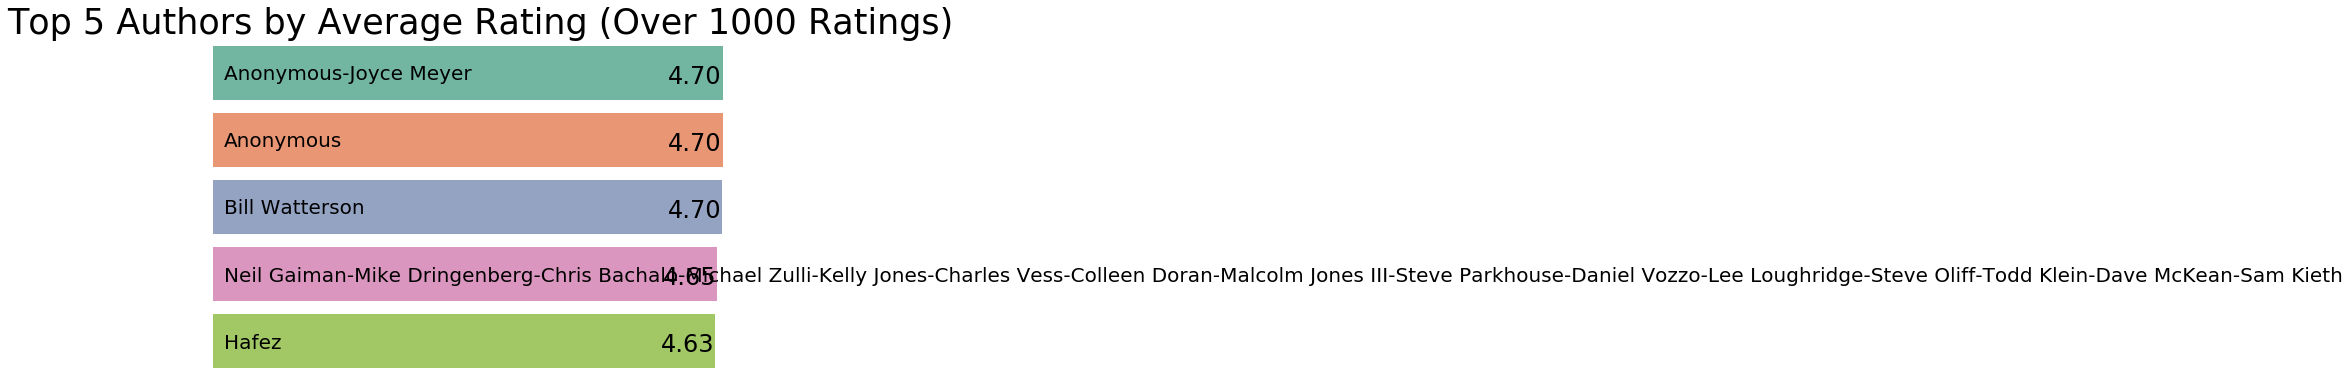

In [17]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(top_5_rating_author_over1000['average_rating'], top_5_rating_author_over1000.index, palette='Set2')
ax.set_title("Top 5 Authors by Average Rating (Over 1000 Ratings)", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-0.5, i.get_y()+0.55, "{0:.2f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(0.1 , i.get_y()+0.5, str(top_5_rating_author_over1000.index[num]), fontsize = 20, color = 'k')
    num += 1

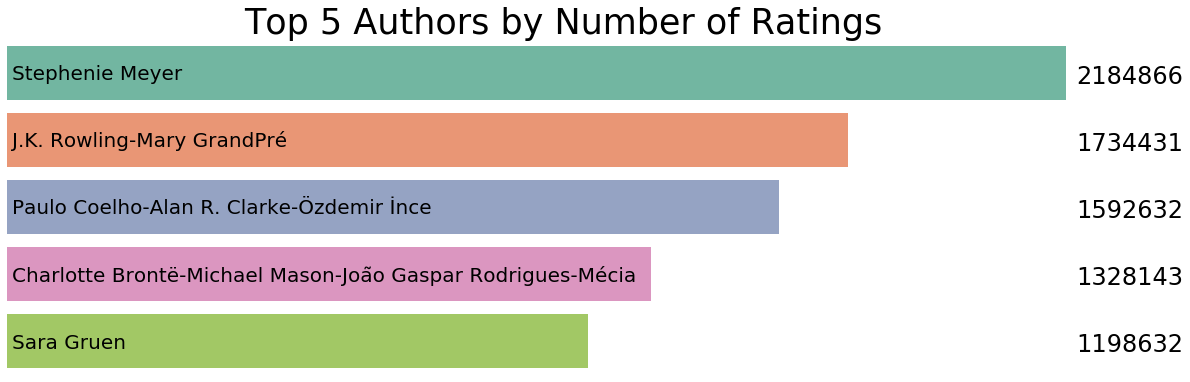

In [18]:
rating_author = df.groupby('authors').mean()
top_5_num_ratings = rating_author.sort_values('ratings_count', ascending=False).head(5)

plt.figure(figsize=(16.5, 6))
ax = sns.barplot(top_5_num_ratings['ratings_count'], top_5_num_ratings.index, palette='Set2')
ax.set_title("Top 5 Authors by Number of Ratings", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(2204866, i.get_y()+0.55, str(round(i.get_width()))[:-2], fontsize = 24, color = 'k')
    ax.text(10000 , i.get_y()+0.5, str(top_5_num_ratings.index[num]), fontsize = 20, color = 'k')
    num += 1


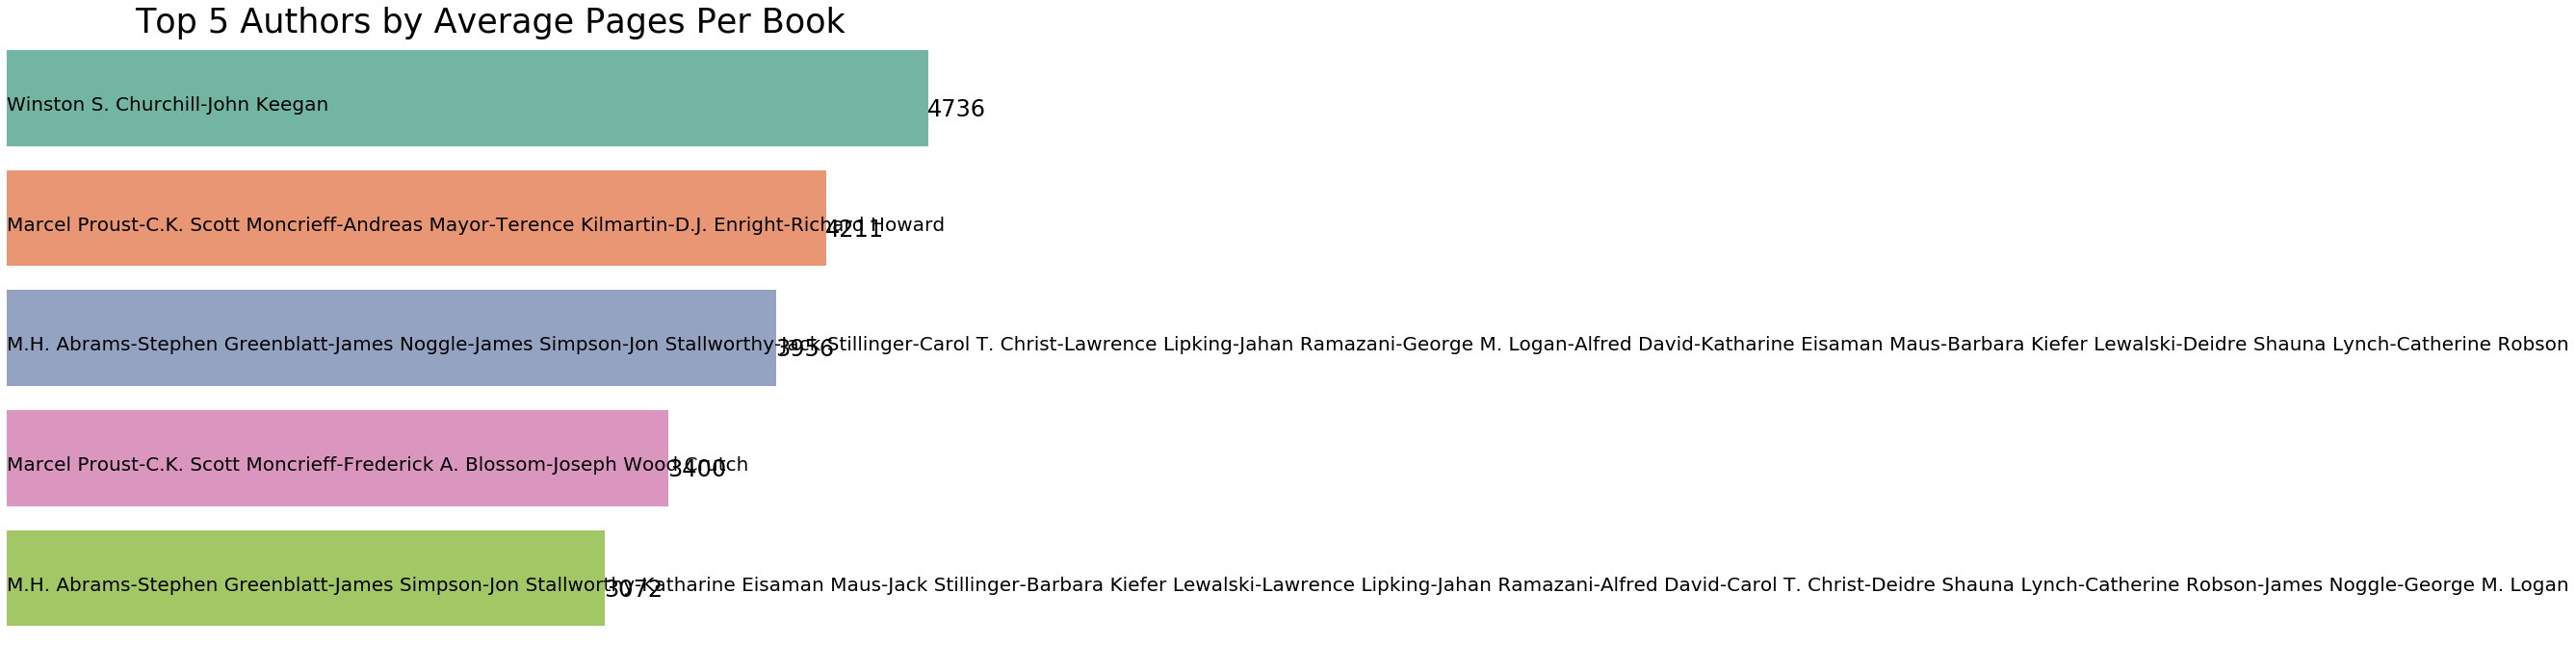

In [19]:
#Attempted graphing of the top 5 authors by avg number of page per book.

author_by_avg_pages = df.groupby('authors')['# num_pages'].mean().reset_index().sort_values('# num_pages', ascending=False).head(5).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(author_by_avg_pages['# num_pages'], author_by_avg_pages.index, palette='Set2')
ax.set_title("Top 5 Authors by Average Pages Per Book", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-2.5, i.get_y()+0.55, str(round(i.get_width()))[:-2], fontsize = 24, color = 'k')
    ax.text(1 , i.get_y()+0.5, str(author_by_avg_pages.index[num]), fontsize = 20, color = 'k')
    num += 1


In [20]:
#Very simple way of displaying the above graph in a slightly more readable way.
#Thinking of using this instead of graph.

for i in range(0,5):
    print('The authors {} average {:.0f} pages per book they have published.'.format(author_by_avg_pages.index[i], author_by_avg_pages['# num_pages'][i]) +'\n')

The authors Winston S. Churchill-John Keegan average 4736 pages per book they have published.

The authors Marcel Proust-C.K. Scott Moncrieff-Andreas Mayor-Terence Kilmartin-D.J. Enright-Richard Howard average 4211 pages per book they have published.

The authors M.H. Abrams-Stephen Greenblatt-James Noggle-James Simpson-Jon Stallworthy-Jack Stillinger-Carol T. Christ-Lawrence Lipking-Jahan Ramazani-George M. Logan-Alfred David-Katharine Eisaman Maus-Barbara Kiefer Lewalski-Deidre Shauna Lynch-Catherine Robson average 3956 pages per book they have published.

The authors Marcel Proust-C.K. Scott Moncrieff-Frederick A. Blossom-Joseph Wood Crutch average 3400 pages per book they have published.

The authors M.H. Abrams-Stephen Greenblatt-James Simpson-Jon Stallworthy-Katharine Eisaman Maus-Jack Stillinger-Barbara Kiefer Lewalski-Lawrence Lipking-Jahan Ramazani-Alfred David-Carol T. Christ-Deidre Shauna Lynch-Catherine Robson-James Noggle-George M. Logan average 3072 pages per book they ha

In [21]:
top_10_books_avg_rating = df.sort_values('average_rating', ascending=False).head(10).set_index('title')

rating_book = df.loc[df['ratings_count'] > 100]
top_10_books_avg_rating_over100 = rating_book.sort_values('average_rating', ascending=False).head(10).set_index('title')

rating_book = df.loc[df['ratings_count'] > 1000]
top_10_books_avg_rating_over1000 = rating_book.sort_values('average_rating', ascending=False).head(10).set_index('title')

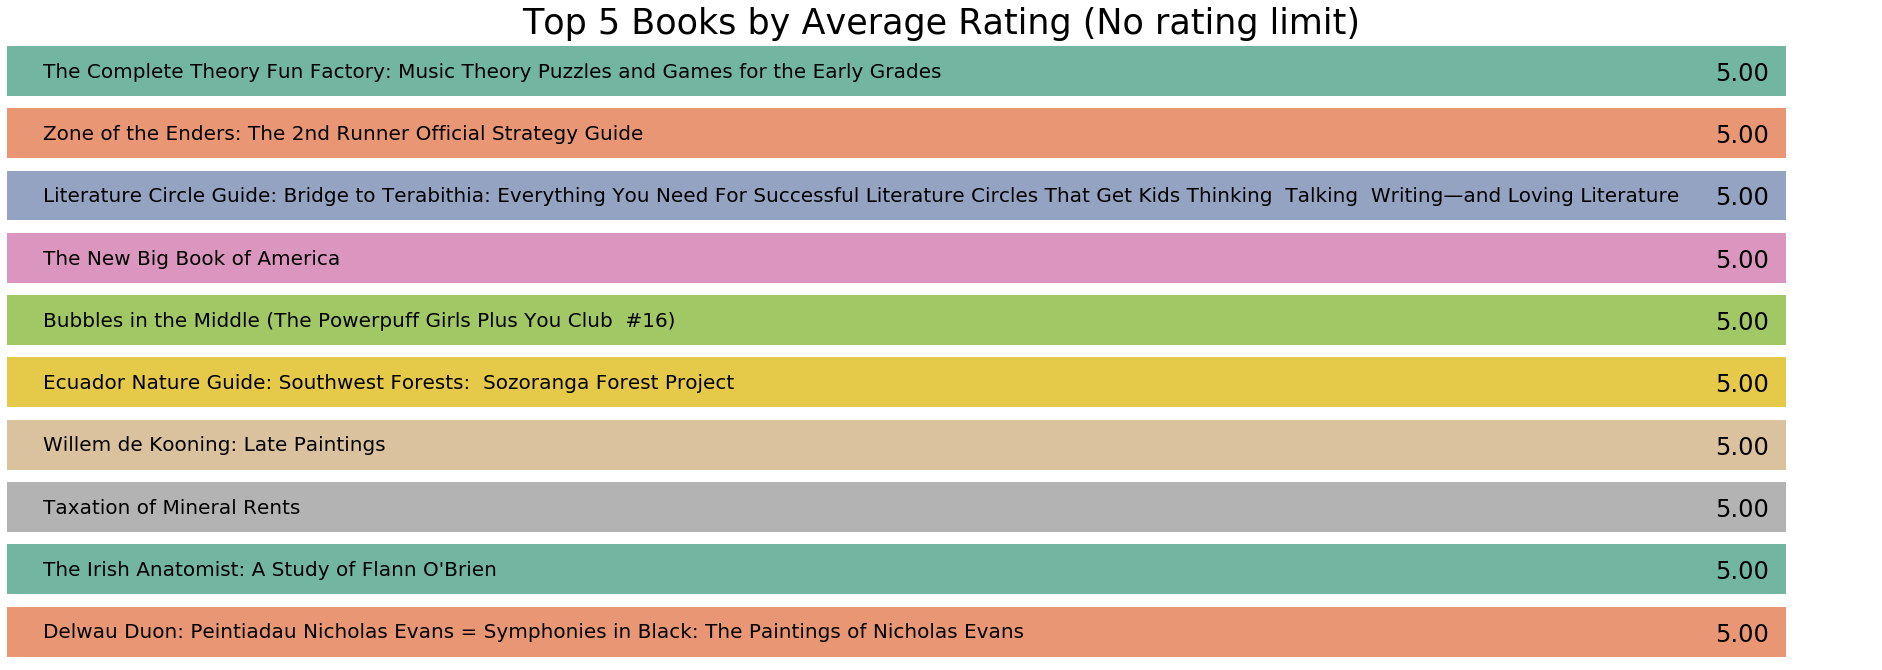

In [22]:
plt.figure(figsize=(27, 10))
ax = sns.barplot(top_10_books_avg_rating['average_rating'], top_10_books_avg_rating.index, palette='Set2')
ax.set_title("Top 5 Books by Average Rating (No rating limit)", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-0.2, i.get_y()+0.55, "{0:.2f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(i.get_x()+0.1, i.get_y()+0.5, str(top_10_books_avg_rating.index[num]), fontsize = 20, color = 'k')
    num += 1


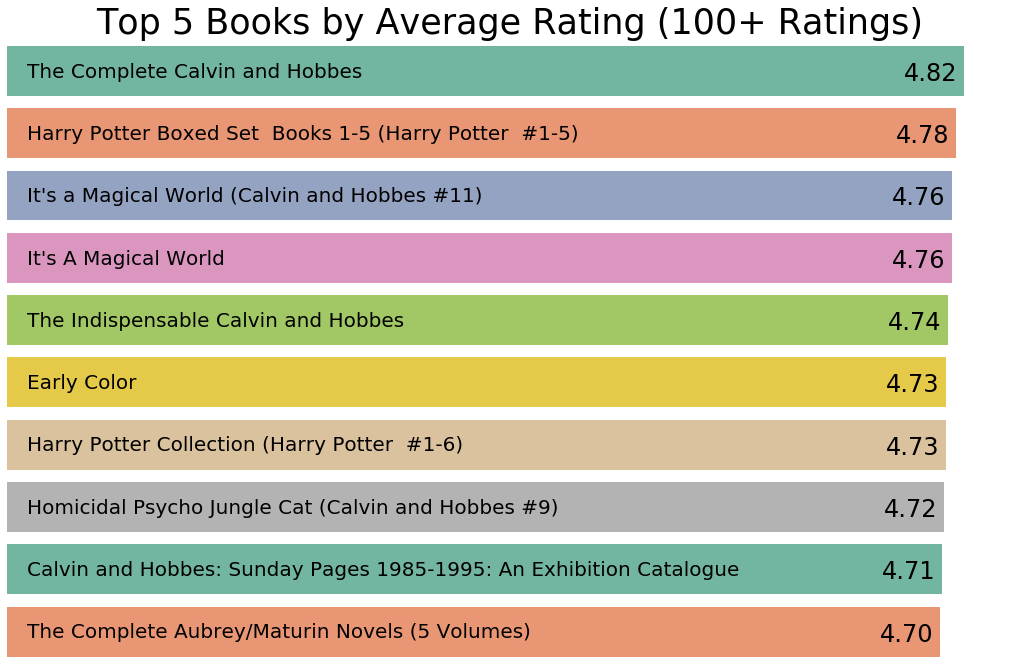

In [23]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(top_10_books_avg_rating_over100['average_rating'], top_10_books_avg_rating_over100.index, palette='Set2')
ax.set_title("Top 5 Books by Average Rating (100+ Ratings)", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-0.3, i.get_y()+0.55, "{0:.2f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(i.get_x()+0.1, i.get_y()+0.5, str(top_10_books_avg_rating_over100.index[num]), fontsize = 20, color = 'k')
    num += 1

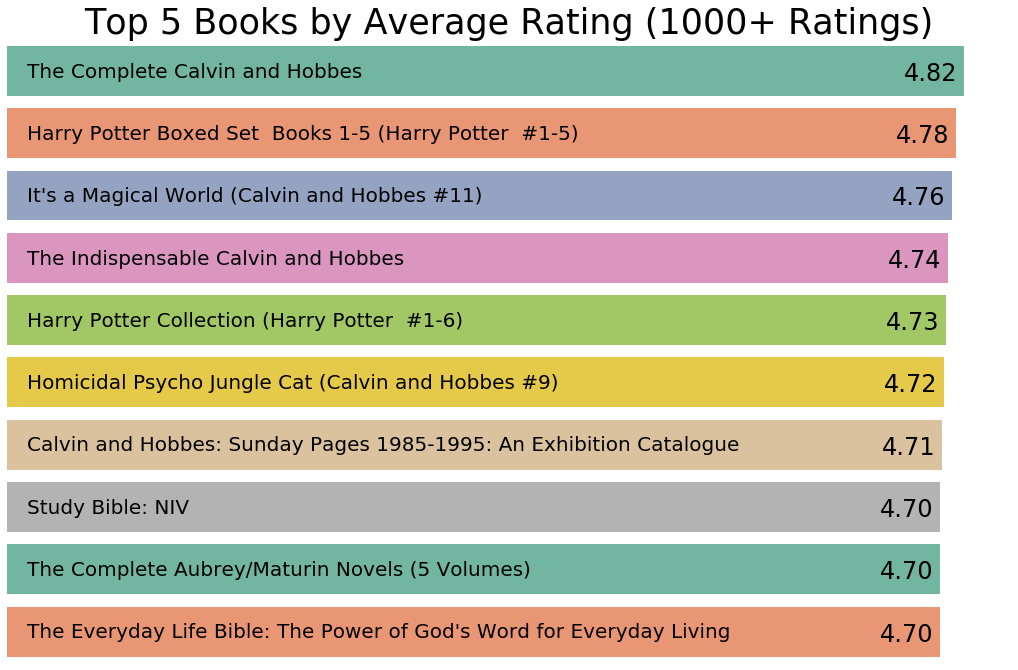

In [24]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(top_10_books_avg_rating_over1000['average_rating'], top_10_books_avg_rating_over1000.index, palette='Set2')
ax.set_title("Top 5 Books by Average Rating (1000+ Ratings)", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-0.3, i.get_y()+0.55, "{0:.2f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(i.get_x()+0.1, i.get_y()+0.5, str(top_10_books_avg_rating_over1000.index[num]), fontsize = 20, color = 'k')
    num += 1

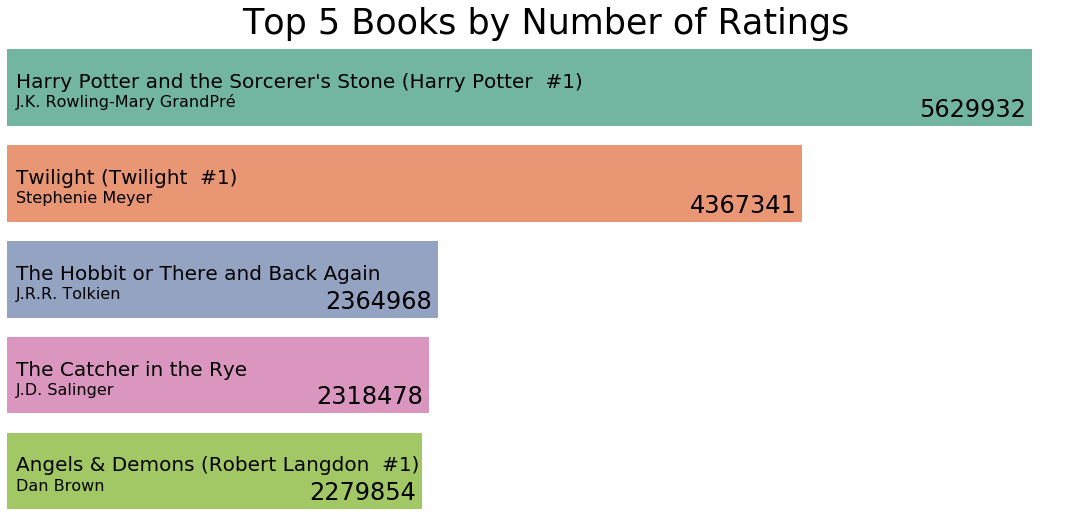

In [97]:
books_by_ratings = df.sort_values('ratings_count', ascending=False).head(5).set_index('title')

plt.figure(figsize=(16, 8))
ax = sns.barplot(books_by_ratings['ratings_count'], books_by_ratings.index, palette='Set2')
ax.set_title("Top 5 Books by Number of Ratings", fontsize=35)
minimalhbargraph()
num = 0
for i in ax.patches:
    ax.text(i.get_width()-620000, i.get_y()+0.7, "{0:.0f}".format(i.get_width()), fontsize = 24, color = 'k')
    ax.text(50000, i.get_y()+0.4, str(books_by_ratings.index[num]), fontsize = 20, color = 'k')
    ax.text(50000, i.get_y()+0.6, str(books_by_ratings['authors'][num]), fontsize = 16, color = 'k')
    num += 1